In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import glob, os
from functools import partial
import sklearn.preprocessing
import pickle

Setting environment variables

In [2]:
plt.style.use('bmh')
pd.options.display.float_format = '{:.5}'.format
pd.set_option('display.max_columns', 12)

Open and read csv file:
Since we don't exactly know which factors are contributing, I decided to plot some graphs.

In [3]:
# f_name = "WPS/10.csv"
# reqd_cols = ["state", "district", "rural", "age", 
#             "is_tubectomy", "is_vasectomy", "is_copper_t", 
#             "is_pills_daily", "is_piils_weekly", "is_emergency_contraceptive", "is_condom", "is_moder_methods", 
#             "is_contraceptive", "is_periodic_abstinence", "is_withdrawal", "is_amenorrahoea", "is_other_traditional_method",
#             "born_alive_total", "is_currently_pregnant", "no_of_times_conceived", "highest_qualification", "currently_widow", 
#             "religion", "social_group_code", "mother_age_when_baby_was_born", "year_of_marriage", "age_at_first_conception",
#             "sex", "previous_current_diff", "year_of_birth", "year_of_intr"]

# with open(f_name) as fopen:
#     headline = fopen.readline().split(',')

# useful_cols = [i for i in xrange(len(headline)) if headline[i] in reqd_cols]

# # df = pd.read_csv(f_name, ',', header=0, usecols=useful_cols, na_values=['.'])
# my_read_csv = partial(pd.read_csv, header=0, usecols=useful_cols)
# df = pd.concat(map(my_read_csv, glob.glob(os.path.join('WPS', "*.csv"))))
# print df.shape

##### Pickle my data

In [4]:
# df.to_pickle('wps.pkl')

In [5]:
df = pd.read_pickle('wps.pkl')

In [6]:
# print df.head(3)
# print df.info()

We only want data from women. So remove men:  
Around 1/3rd of our data is empty. They have less than 7 columns filled out of 31. Better drop it.

In [7]:
def mark_bar (rects):
    # For each bar: Place a label
    for rect in rects:
        # Get X and Y placement of label from rect
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = 5
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = int(y_value)

        # Create annotation
        plt.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

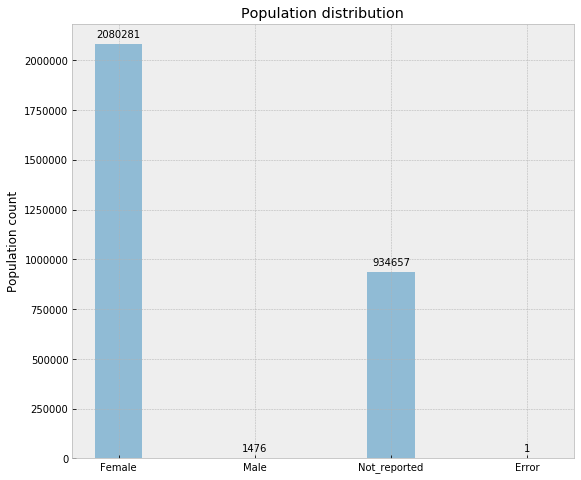

       state  district  rural  age  previous_current_diff  year_of_intr  \
4128    10.0      10.0    1.0 31.0                   32.0           nan   
12256   10.0      10.0    1.0 25.0                   35.0           nan   
12418   10.0      15.0    1.0 39.0                    0.0           nan   

                ...             religion  social_group_code  year_of_marriage  \
4128            ...                  nan                nan               nan   
12256           ...                  nan                nan               nan   
12418           ...                  nan                nan               nan   

       highest_qualification  no_of_times_conceived  age_at_first_conception  
4128                     nan                    nan                      nan  
12256                    nan                    nan                      nan  
12418                    nan                    nan                      nan  

[3 rows x 31 columns]
Null	1557


In [8]:
a = df.sex.value_counts()
sex_dist = [a[2], a[1], df.sex.isnull().sum(), a[5]]

objects = ('Female', 'Male', 'Not_reported', 'Error')
y_pos = np.arange(len(objects))

plt.figure(figsize=(9, 8))
ax = plt.bar(y_pos, sex_dist, align='center', alpha=0.5, width = 0.35)
plt.xticks(y_pos, objects)
plt.ylabel('Population count')
plt.title('Population distribution')
mark_bar(ax.patches)
plt.savefig('Sex-wise population distribution.png')

plt.show()
# save_to_file("simple_plot.png", "png")
print df[df.sex.isnull()].head(3)
df.dropna(thresh=7, inplace=True)
print "Null\t" + str(df.sex.isnull().sum())

df = df[df['sex'] == 2]

## Analyse Overall data

### State:
State does not have any empty column.  
We have data from 9 states.

False


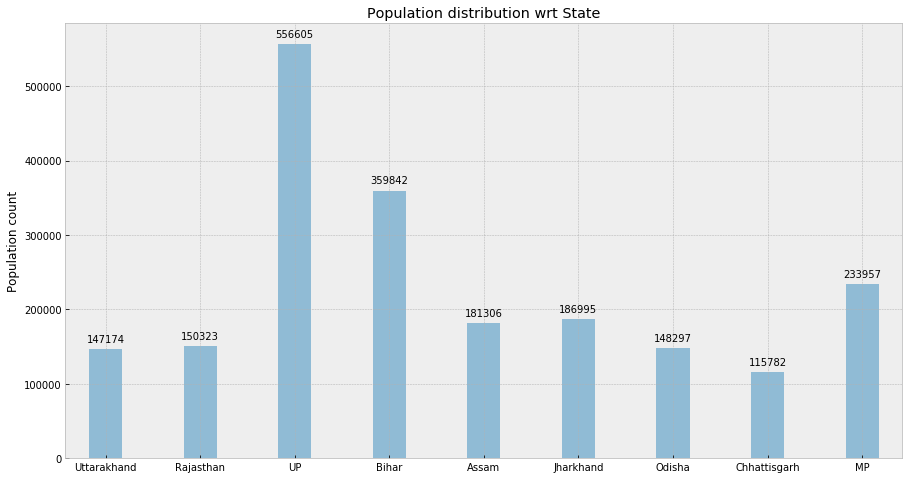

In [9]:
print df.state.isnull().values.any()
a =  df.state.value_counts(sort=False)
plt.figure(figsize=(15, 8))
objects = ('Uttarakhand', 'Rajasthan', 'UP', 'Bihar', 'Assam', 'Jharkhand', 'Odisha','Chhattisgarh','MP')

a.index = objects
ax = a.plot.bar(rot=0, align='center', alpha=0.5, width = 0.35)
plt.ylabel('Population count')
plt.title('Population distribution wrt State')
mark_bar(ax.patches)
plt.savefig('State-wise population distribution.png')

plt.show()

### Age:
Age does not have any empty column.  
We don't want data for people with age either less than 10 years or more than 50 years.

False


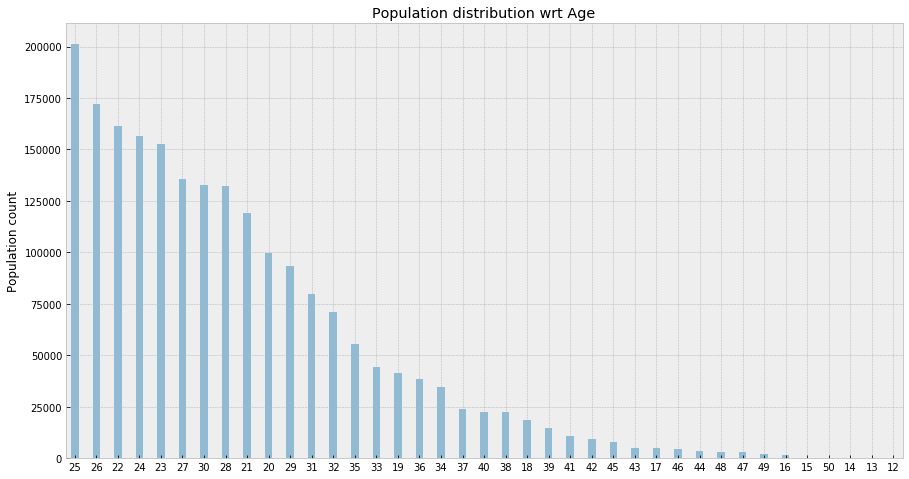

In [10]:
print df.age.isnull().values.any()
df = df[(df['age'] >= 10) & (df['age'] <= 50)]

a =  df.age.value_counts()
plt.figure(figsize=(15, 8))
a.index = a.index.map(int) #change datatype of index
ax = a.plot.bar(rot=0, align='center', alpha=0.5, width = 0.35)
plt.ylabel('Population count')
plt.title('Population distribution wrt Age')
plt.savefig('Age-wise population distribution.png')

plt.show()

### Year of interview
Consider column "year of interview". If it is empty , we will fill it by the Mode of "year of interview".

In [11]:
print df['year_of_intr'].unique()
print df.year_of_intr.isnull().values.any()
df = df[df['year_of_intr'] != 17677]
df['year_of_intr'].fillna((df['year_of_intr'].mode())[0], inplace=True)

[  2011.   2012.   2010.   2013.     nan  17677.]
True


### Remove widows from data, Add new column born_year
0.5% of women are widows. 
We will remove currently_widow column and add column born_year.  
We will calculate as born_year = year_of_interview - age

In [12]:
df1 = df[df['currently_widow'] ==1 ]
print df1.shape
print df1.age.describe()

df = df[df['currently_widow'] != 1] 
df.rename(columns={'currently_widow': 'born_year'}, inplace=True)

df['born_year'] = (df['year_of_intr']-df['age'])
print df.born_year.isnull().values.any()
print df.shape

(10774, 31)
count   1.0774e+04
mean        29.691
std         7.1994
min           15.0
25%           25.0
50%           28.0
75%           35.0
max           50.0
Name: age, dtype: float64
False
(2069493, 31)


Looking at column "currently_widow" : 
* min age of widow is 15years.
* the average age of widow is 29.7years. 
* 75% of widows in our data are of age less than 35years.

In [13]:
# We are making birth year groups like 60s, 70s, 80s, 90s, 00s.

# Matrix of age of parent when first child vs fraction of such parents. Each row denote periods like 70s.

# Each column denote age of parent when first child was born

# Each cell contain fraction of such parent.

Remove try-

We already have a column named year_of_birth.  
We will fill the null values using where born_year is available and otherwise with avg year_of_birth

In [14]:
print df.year_of_birth.isnull().values.any()
print df.year_of_birth.isnull().sum()
df['year_of_birth'].fillna(df['born_year'])
print df.year_of_birth.isnull().values.any()
print df.year_of_birth.isnull().sum()
df['year_of_birth'].fillna(df['year_of_birth'].mean(), inplace=True)
print df.year_of_birth.isnull().values.any()
print df.year_of_birth.isnull().sum()
# print df.year_of_birth.value_counts(sort=False) #.sort_values(ascending=True) (add it if you want to sort accrding to second col)
df.drop('born_year', axis=1, inplace=True)
df = df[(df.year_of_birth >= 1960) & (df.year_of_birth <= 1999)]
print df.shape

True
79
True
79
False
0
(2069228, 30)


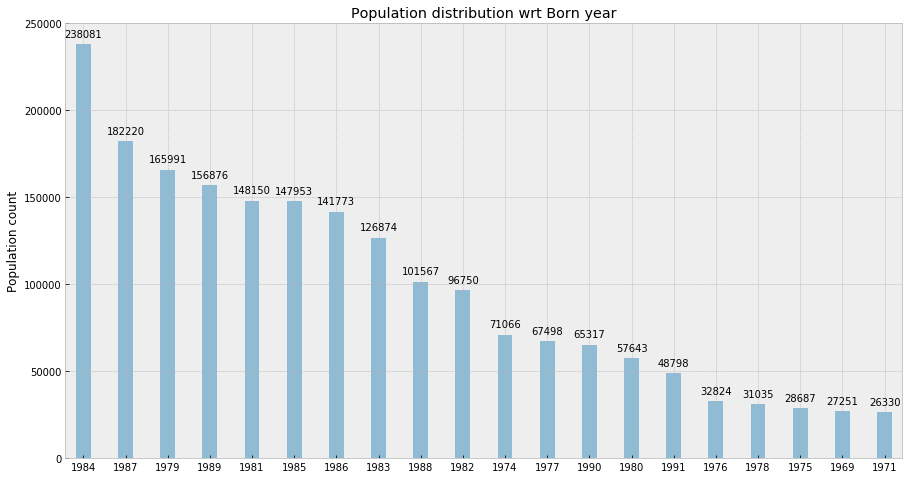

In [15]:
a =  df.year_of_birth.value_counts(sort=True)
plt.figure(figsize=(15, 8))
a.index = a.index.map(int) #change datatype of index
a = a.head(20)
ax = a.plot.bar(rot=0, align='center', alpha=0.5, width = 0.35)
plt.ylabel('Population count')
plt.title('Population distribution wrt Born year')
mark_bar(ax.patches)
plt.savefig('Birth year-wise population distribution.png')

plt.show()

### Year of marriage
We should only consider people whose year of marriage is >=1960 as our population has born after 1960.   
191 year haven't reported their year of marriage.

In [16]:
print df['year_of_marriage'].describe()
print df.year_of_marriage.isnull().values.any()
print df.year_of_marriage.isnull().sum()
df = df[df.year_of_marriage >= 1960]
print df.year_of_marriage.isnull().values.any()

count   2.069e+06
mean       2000.2
std        43.135
min           0.0
25%        1998.0
50%        2002.0
75%        2006.0
max        2011.0
Name: year_of_marriage, dtype: float64
True
179
False


### Column mother's age when her first baby was born
Less than 10% columns are empty. That maybe due to she may not have given birth to baby yet.  
So we will extrapolate the data and fill these by assuming that they will have their first baby when  
their age = mean(age of population when their first baby was born)  
There are 0.2% women whose age is marked 0years. We will remove them from further calculations.  
There are around 1500 females whose age is marked lower than the age when they became mother. We also removed them from consideration.

In [17]:
# df.age = np.where(df.age >= df.mother_age_when_baby_was_born, df.age, df.mother_age_when_baby_was_born) #conditonal
df = df[df.mother_age_when_baby_was_born <= df.age]
print df.mother_age_when_baby_was_born.isnull().values.any()
print df.mother_age_when_baby_was_born.isnull().sum()
df['mother_age_when_baby_was_born'].fillna(int(df['mother_age_when_baby_was_born'].mean()), inplace=True)

print df[df['mother_age_when_baby_was_born'] <= 5 ].shape
df = df[(df['mother_age_when_baby_was_born'] > 5) & (df['mother_age_when_baby_was_born'] <= 50)]
print df['mother_age_when_baby_was_born'].describe()
print df[df['mother_age_when_baby_was_born']>=50].shape

False
0
(7739, 30)
count   2.0329e+06
mean         21.06
std         3.3073
min           11.0
25%           19.0
50%           21.0
75%           23.0
max           49.0
Name: mother_age_when_baby_was_born, dtype: float64
(0, 30)


##### Looking at column "mother_age_when_baby_was_born" : 
* min age of woman when she had first child is 11years.
* the average age of women at first born child is 21years. 
* 75% of women have their first child at the age of 23years while 
* max age of woman whn her first child was born is 49years. 
* There are only 19 women who had their first child at the age more than 50years.

In [18]:
print df.mother_age_when_baby_was_born.isnull().values.any()
mybins = range(1959, 2000, 10)
groups = df.groupby([pd.cut(df.year_of_birth, bins=mybins), 'mother_age_when_baby_was_born']) #1st arg = row, 2nd arg = col
df1 = groups.size().unstack()
df1.fillna(0, inplace=True)
df1 = np.array(df1)
age_of_parent_when_first_child = sklearn.preprocessing.normalize(df1, axis=1, norm='l1').round(3)

False


(4L, 39L) 39


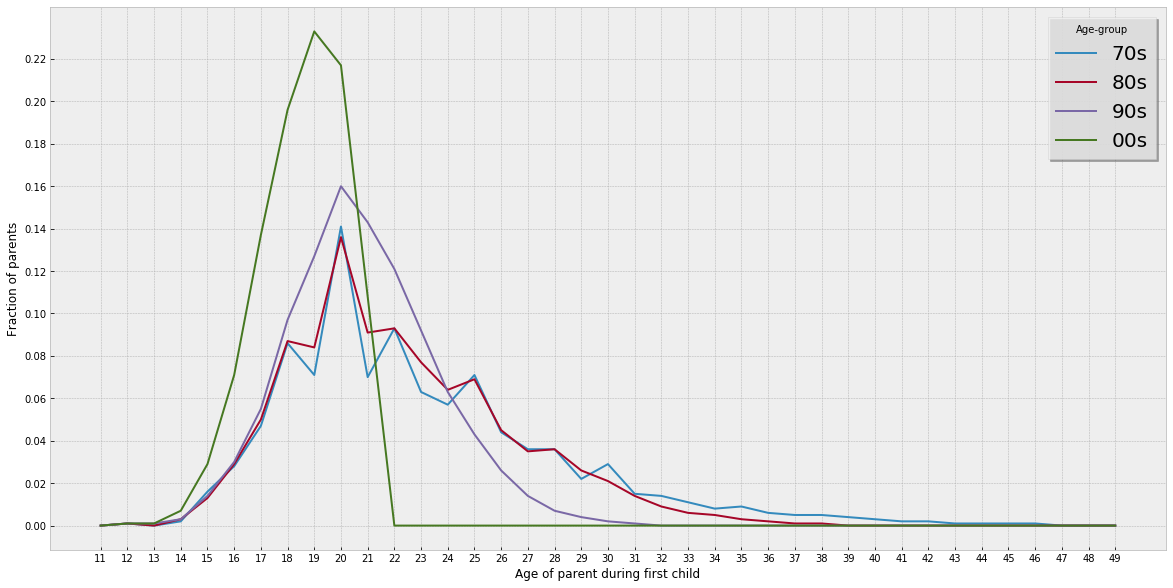

In [19]:
x = [i for i in xrange(11, 50)]
labels = ['70s', '80s', '90s', '00s']
plt.figure(figsize=(20,10))
i_label = 0
print (age_of_parent_when_first_child).shape, len(x)
for age_group in age_of_parent_when_first_child:
    plt.plot(x, age_group, label = labels[i_label])
    i_label += 1
plt.legend(loc='best', fontsize = 20, shadow = True, fancybox = False, title ='Age-group', ncol =1)
plt.title('')# a title notation
plt.xlabel('Age of parent during first child') # adding xlabel
plt.ylabel('Fraction of parents') # adding ylabel
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.yticks(np.arange(age_of_parent_when_first_child.min(), age_of_parent_when_first_child.max(), 0.02))
plt.grid(True)
plt.savefig('Age_of_parent_first_child-population fraction.png')

plt.show()

Conclusions from above graph:
* Irrespective of birth year of women, most of the women has their first child at the age of 20.
* Data is not enough for women born in 1990-2000. We have data for upto 1996 born women.

Goal: Find months of gap between last two pregnancies:

In [20]:
print df['previous_current_diff'].describe()
print df.previous_current_diff.isnull().values.any()
print df.previous_current_diff.isnull().sum()

count   1.6484e+06
mean        29.945
std         24.419
min            0.0
25%           12.0
50%           27.0
75%           44.0
max          538.0
Name: previous_current_diff, dtype: float64
True
384417


In [21]:
df1 = df.copy()
print df1.previous_current_diff.isnull().sum()
print df1.shape
df1.fillna({'previous_current_diff':0}, inplace=True)
print df1[(df1['previous_current_diff'] >= 1) & (df1['previous_current_diff'] < 5)].shape
print df1[(df1.previous_current_diff > 99)].shape

print df1[(df1.previous_current_diff == 0)].shape

df1 = df1[(df1['previous_current_diff'] >= 5) & (df1['previous_current_diff'] <= 99)] # I dropped some useful rows.
print df1.shape

mybins = range(1959, 2000, 10)
groups = df1.groupby([pd.cut(df1.year_of_birth, bins=mybins), 'previous_current_diff']) #1st arg = row, 2nd arg = col
df1 = np.array(groups.size().unstack())
parent_age_preg_gap = sklearn.preprocessing.normalize(df1, axis=1, norm='l1').round(3)
print parent_age_preg_gap

384417
(2032854, 30)
(2583, 30)
(22, 30)
(755066, 30)
(1275183, 30)
[[ 0.     0.     0.     0.001  0.001  0.005  0.004  0.024  0.012  0.01
   0.008  0.008  0.006  0.01   0.007  0.014  0.007  0.011  0.011  0.109
   0.016  0.014  0.016  0.01   0.009  0.013  0.008  0.016  0.008  0.011
   0.011  0.099  0.014  0.014  0.011  0.011  0.009  0.01   0.007  0.008
   0.009  0.008  0.009  0.041  0.011  0.009  0.008  0.008  0.006  0.007
   0.006  0.006  0.006  0.006  0.006  0.029  0.007  0.006  0.006  0.009
   0.005  0.004  0.003  0.004  0.005  0.004  0.004  0.018  0.005  0.005
   0.004  0.004  0.003  0.003  0.003  0.004  0.002  0.003  0.002  0.012
   0.004  0.003  0.002  0.002  0.002  0.002  0.002  0.002  0.002  0.002
   0.002  0.008  0.002  0.002  0.1  ]
 [ 0.     0.     0.     0.001  0.001  0.004  0.004  0.026  0.013  0.011
   0.011  0.011  0.008  0.012  0.009  0.012  0.011  0.014  0.014  0.079
   0.02   0.018  0.017  0.014  0.012  0.016  0.011  0.016  0.012  0.013
   0.014  0.074  0.017  0.017  

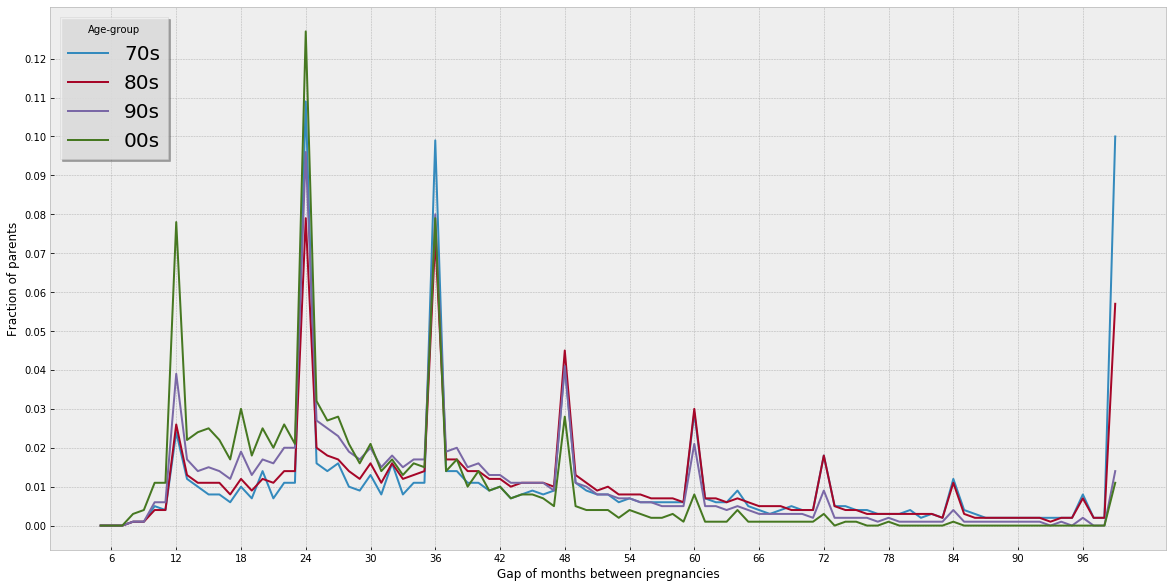

In [22]:
x = [i for i in xrange(5, 100)]
labels = ['70s', '80s', '90s', '00s', '21s']
plt.figure(figsize=(20,10))
i_label = 0
for age_group in parent_age_preg_gap:
    plt.plot(x, age_group, label = labels[i_label])
    i_label += 1
plt.legend(loc='best', fontsize = 20, shadow = True, fancybox = False, title ='Age-group', ncol =1)
plt.title('')# a title notation
plt.xlabel('Gap of months between pregnancies') # adding xlabel
plt.ylabel('Fraction of parents') # adding ylabel
plt.xticks(np.arange(min(x)+1, max(x)+1, 6.0))
plt.yticks(np.arange(parent_age_preg_gap.min(), parent_age_preg_gap.max(), 0.01))
plt.grid(True)
plt.savefig('Month_preg_gap-born_tenth.png')

plt.show()

Conclusions:
* The average no of months between two pregnancies is 34.5 months
* 50% of women kept atleast gap of 33 months between two pregnancies.
* There is an interesting pattern of gap of multiples of 12 months between two pregnancy.

## Contraceptive use analysis:

0.0         269.0
1.0    1.9997e+06
2.0    2.6028e+04
3.0           4.0
15.0          nan
Name: is_tubectomy, dtype: float64
[ 1999698.  1934665.  1615784.  1755242.  1277486.   882232.  1713394.
   353227.]
1.0    1999698
2.0      26028
0.0        269
3.0          4
Name: is_tubectomy, dtype: int64
(8L,)
(8L,)


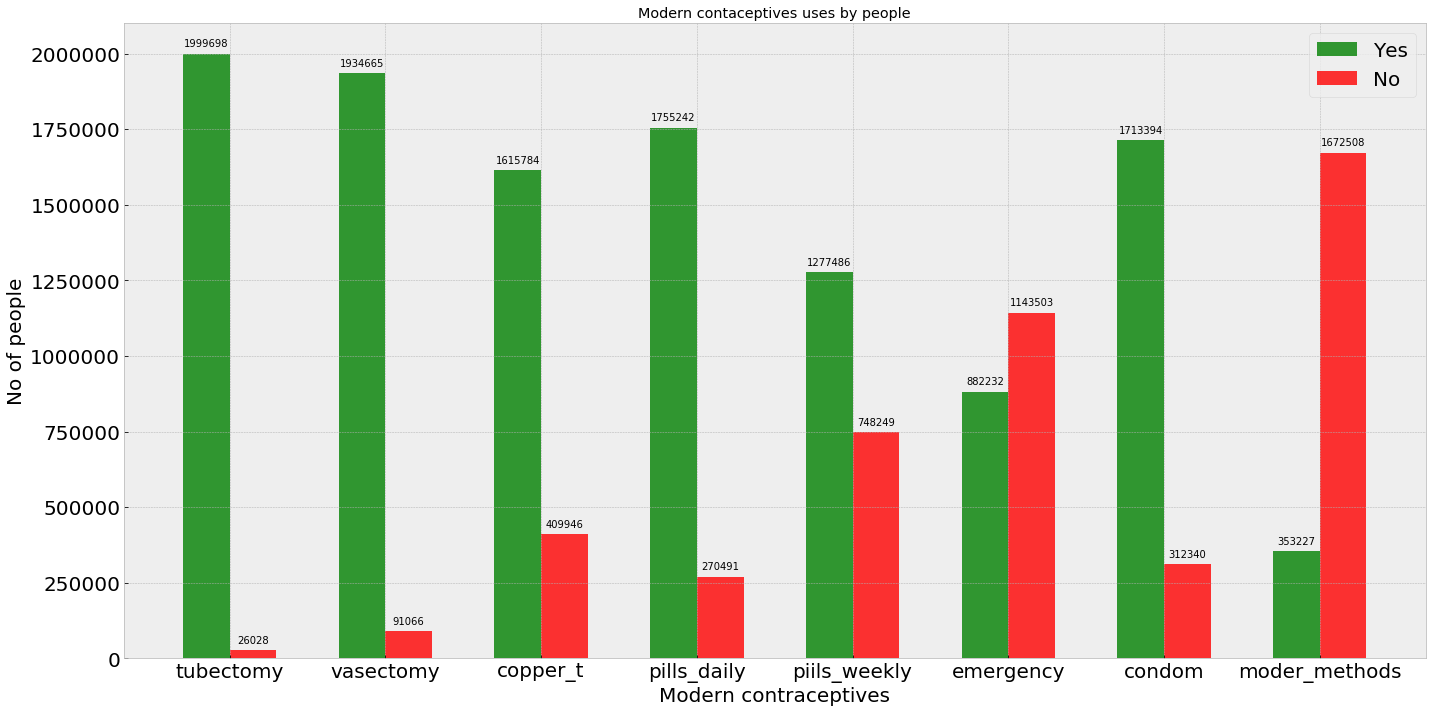

In [23]:
modern = ["is_tubectomy", "is_vasectomy", "is_copper_t", 
                "is_pills_daily", "is_piils_weekly", "is_emergency_contraceptive", "is_condom", "is_moder_methods"]
traditional = ["is_contraceptive", "is_periodic_abstinence", "is_withdrawal", "is_amenorrahoea", "is_other_traditional_method"]

# print df[modern].describe()
# print df[traditional].describe()
# print df.is_tubectomy.isnull().values.any()
# print df.is_tubectomy.isnull().sum()

modern_mat = df[modern].apply(lambda x: x.value_counts())
print modern_mat["is_tubectomy"]
print np.array(modern_mat.head(3))[1]
traditional_mat = df[traditional].apply(lambda x: x.value_counts())
print df.is_tubectomy.value_counts()
# print modern_mat
# data to plot
n_groups = modern_mat.shape[1]
# print np.array(modern_mat.head(2))[0]
# print modern_mat.shape[1]
modern_yes = np.array(modern_mat.head(3))[1]
print modern_yes.shape
modern_no = np.array(modern_mat.head(3))[2]
print modern_no.shape

# create plot
# plt.figure(figsize=(20,10))
# fig_size = plt.rcParams["figure.figsize"]
# fig_size[0] = 20
# fig_size[1] = 10
# plt.rcParams["figure.figsize"] = fig_size

fig, ax = plt.subplots(figsize=(20, 10))
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)
index = np.arange(n_groups)
bar_width = 0.3
opacity = 0.8

rects1 = plt.bar(index, modern_yes, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Yes')

rects2 = plt.bar(index + bar_width, modern_no, bar_width,
                 alpha=opacity,
                 color='r',
                 label='No')

plt.xlabel('Modern contraceptives')
plt.ylabel('No of people')
plt.title('Modern contaceptives uses by people')
modern_contraceptives = [c[3:] if ('emergency' not in c) else 'emergency' for c in modern]
plt.xticks(index + bar_width-0.15, modern_contraceptives)
plt.legend(fontsize=20)
mark_bar(rects1.patches)
mark_bar(rects2.patches)
plt.tight_layout()
plt.savefig('Modern_contraceptive_use-population_distribution.png')

plt.show()

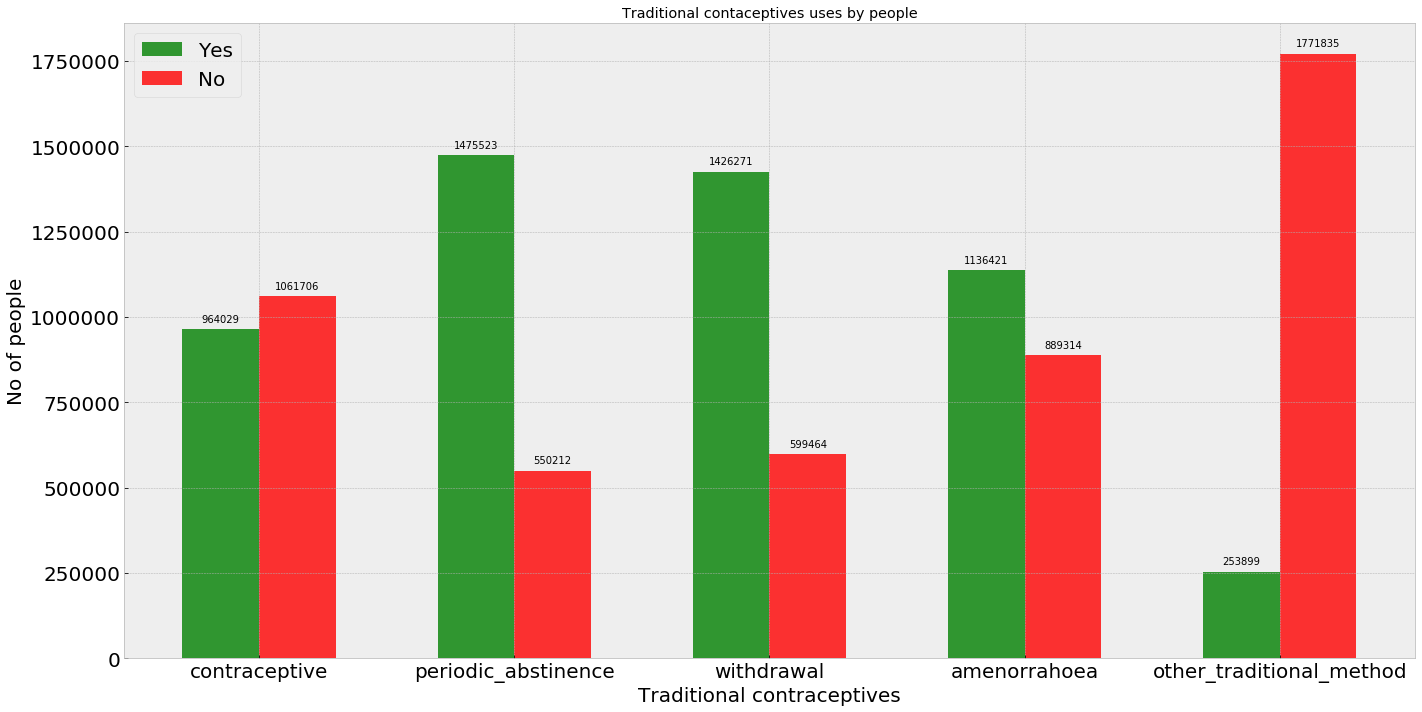

In [24]:
n_groups = traditional_mat.shape[1]
# print np.array(modern_mat.head(2))[0]
# print modern_mat.shape[1]
traditional_yes = np.array(traditional_mat.head(3))[1]
traditional_no = np.array(traditional_mat.head(3))[2]

# create plot
# plt.figure(figsize=(20,10))
# fig_size = plt.rcParams["figure.figsize"]
# fig_size[0] = 20
# fig_size[1] = 10
# plt.rcParams["figure.figsize"] = fig_size

fig, ax = plt.subplots(figsize=(20, 10))
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)
index = np.arange(n_groups)
bar_width = 0.3
opacity = 0.8

rects1 = plt.bar(index, traditional_yes, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Yes')

rects2 = plt.bar(index + bar_width, traditional_no, bar_width,
                 alpha=opacity,
                 color='r',
                 label='No')

plt.xlabel('Traditional contraceptives')
plt.ylabel('No of people')
plt.title('Traditional contaceptives uses by people')
traditional_contraceptives = [c[3:] for c in traditional]
plt.xticks(index + bar_width-0.15, traditional_contraceptives)
plt.legend(fontsize=20)
mark_bar(rects1.patches)
mark_bar(rects2.patches)
plt.tight_layout()
plt.savefig('Traditional_contraceptive_use-population_distribution.png')

plt.show()

In [25]:
state_map = {}
state_map['assam']          = [18, ['KOKRAJHAR', 'DHUBRI', 'GOALPARA', 'BONGAIGAON', 'BARPETA', 'KAMRUP', 'NALBARI', 'DARRANG', 'MARIGAON', 'NAGAON', 'SONITPUR', 'LAKHIMPUR', 'DHEMAJI', 'TINSUKIA', 'DIBRUGARH', 'SIBSAGAR', 'JORHAT', 'GOLAGHAT', 'KARBI ANGLONG', 'NORTH CACHAR HILLS', 'CACHAR', 'KARIMGANJ', 'HAILAKANDI']]
state_map['bihar']          = [10, ['PASHCHIM CHAMPARAN', 'PURBA CHAMPARAN', 'SHEOHAR', 'SITAMARHI', 'MADHUBANI', 'SUPAUL', 'ARARIA', 'KISHANGANJ', 'PURNIA', 'KATIHAR', 'MADHEPURA', 'SAHARSA', 'DARBHANGA', 'MUZAFFARPUR', 'GOPALGANJ', 'SIWAN', 'SARAN', 'VAISHALI', 'SAMASTIPUR', 'BEGUSARAI', 'KHAGARIA', 'BHAGALPUR', 'BANKA', 'MUNGER', 'LAKHISARAI', 'SHEIKHPURA', 'NALANDA', 'PATNA', 'BHOJPUR', 'BUXAR', 'KAIMUR (BHABUA)', 'ROHTAS', 'JEHANABAD', 'AURANGABAD', 'GAYA', 'NAWADA', 'JAMUI']]
state_map['chhattisgarh']   = [22, ['KORIYA', 'SURGUJA', 'JASHPUR', 'RAIGARH', 'KORBA', 'JANJGIR - CHAMPA', 'BILASPUR', 'KAWARDHA', 'RAJNANDGAON', 'DURG', 'RAIPUR', 'MAHASAMUND', 'DHAMTARI', 'KANKER', 'BASTAR', 'DANTEWADA']]
state_map['jharkhand']      = [20, ['GARHWA', 'PALAMU', 'CHATRA', 'HAZARIBAGH', 'KODARMA', 'GIRIDIH', 'DEOGHAR', 'GODDA', 'SAHIBGANJ', 'PAKAUR', 'DUMKA', 'DHANBAD', 'BOKARO', 'RANCHI', 'LOHARDAGA', 'GUMLA', 'PASHCHIMI SINGHBHUM', 'PURBI SINGHBHUM']]
state_map['odisha']         = [21, ['BARGARH', 'JHARSUGUDA', 'SAMBALPUR', 'DEBAGARH', 'SUNDARGARH', 'KENDUJHAR', 'MAYURBHANJ', 'BALESHWAR', 'BHADRAK', 'KENDRAPARA', 'JAGATSINGHAPUR', 'CUTTACK', 'JAJAPUR', 'DHENKANAL', 'ANUGUL', 'NAYAGARH', 'KHORDHA', 'PURI', 'GANJAM', 'GAJAPATI', 'KANDHAMAL', 'BAUDH', 'SONAPUR', 'BALANGIR', 'NUAPADA', 'KALAHANDI', 'RAYAGADA', 'NABARANGAPUR', 'KORAPUT', 'MALKANGIRI']]
state_map['madhya pradesh'] = [23, ['SHEOPUR', 'MORENA', 'BHIND', 'GWALIOR', 'DATIA', 'SHIVPURI', 'GUNA', 'TIKAMGARH', 'CHHATARPUR', 'PANNA', 'SAGAR', 'DAMOH', 'SATNA', 'REWA', 'UMARIA', 'SHAHDOL', 'SIDHI', 'NEEMUCH', 'MANDSAUR', 'RATLAM', 'UJJAIN', 'SHAJAPUR', 'DEWAS', 'JHABUA', 'DHAR', 'INDORE', 'WEST NIMAR', 'BARWANI', 'EAST NIMAR', 'RAJGARH', 'VIDISHA', 'BHOPAL', 'SEHORE', 'RAISEN', 'BETUL', 'HARDA', 'HOSHANGABAD', 'KATNI', 'JABALPUR', 'NARSIMHAPUR', 'DINDORI', 'MANDLA', 'CHHINDWARA', 'SEONI', 'BALAGHAT']]
state_map['rajasthan']      = [8,  ['GANGANAGAR', 'HANUMANGARH', 'BIKANER', 'CHURU', 'JHUNJHUNUN', 'ALWAR', 'BHARATPUR', 'DHAULPUR', 'KARAULI', 'SAWAI MADHOPUR', 'DAUSA', 'JAIPUR', 'SIKAR', 'NAGAUR', 'JODHPUR', 'JAISALMER', 'BARMER', 'JALOR', 'SIROHI', 'PALI', 'AJMER', 'TONK', 'BUNDI', 'BHILWARA', 'RAJSAMAND', 'UDAIPUR', 'DUNGARPUR', 'BANSWARA', 'CHITTAURGARH', 'KOTA', 'BARAN', 'JHALAWAR']]
state_map['uttar pradesh']  = [9,  ['SAHARANPUR', 'MUZAFFARNAGAR', 'BIJNOR', 'MORADABAD', 'RAMPUR', 'JYOTIBA PHULE NAGAR', 'MEERUT', 'BAGHPAT', 'GHAZIABAD', 'GAUTAM BUDDHA NAGAR', 'BULANDSHAHR', 'ALIGARH', 'HATHRAS', 'MATHURA', 'AGRA', 'FIROZABAD', 'ETAH', 'MAINPURI', 'BUDAUN', 'BAREILLY', 'PILIBHIT', 'SHAHJAHANPUR', 'LAKHIMPUR KHERI', 'SITAPUR', 'HARDOI', 'UNNAO', 'LUCKNOW', 'RAE BARELI', 'FARRUKHABAD', 'KANNAUJ', 'ETAWAH', 'AURAIYA', 'KANPUR DEHAT', 'KANPUR NAGAR', 'JALAUN', 'JHANSI', 'LALITPUR', 'HAMIRPUR', 'MAHOBA', 'BANDA', 'CHITRAKOOT', 'FATEHPUR', 'PRATAPGARH', 'KAUSHAMBI', 'ALLAHABAD', 'BARABANKI', 'FAIZABAD', 'AMBEDKAR NAGAR', 'SULTANPUR', 'BAHRAICH', 'SHRAWASTI', 'BALRAMPUR', 'GONDA', 'SIDDHARTHNAGAR', 'BASTI', 'SANT KABIR NAGAR', 'MAHARAJGANJ', 'GORAKHPUR', 'KUSHINAGAR', 'DEORIA', 'AZAMGARH', 'MAU', 'BALLIA', 'JAUNPUR', 'GHAZIPUR', 'CHANDAULI', 'VARANASI', 'SANT RAVIDAS NAGAR BHADOHI', 'MIRZAPUR', 'SONBHADRA']]
state_map['uttarakhand']    = [5,  ['UTTARKASHI', 'CHAMOLI', 'RUDRAPRAYAG', 'TEHRI GARHWAL', 'DEHRADUN', 'GARHWAL', 'PITHORAGARH', 'BAGESHWAR', 'ALMORA', 'CHAMPAWAT', 'NAINITAL', 'UDHAM SINGH NAGAR', 'HARDWAR']]

def teen_mom_distribution(state_name):
    [state_code, dist] = state_map[state_name]
    mybins = range(0, len(dist)+1)
    df1 = df[['state', 'district', 'mother_age_when_baby_was_born']][df.state == state_code]

    groups = df1.groupby([pd.cut(df1.district, bins=mybins), 'mother_age_when_baby_was_born']) #1st arg = row, 2nd arg = col
    df1 = groups.size().unstack()
    df1 = df1.fillna(0)
    df1 = np.array(df1)
    dist_wise_parent_age_at_child1 = sklearn.preprocessing.normalize(df1, axis=1, norm='l1').round(3)
    dist_wise_fraction_of_teen_parent = np.around(map(np.sum, dist_wise_parent_age_at_child1[:, :6]), decimals=3)

    zipped_list = zip(dist_wise_fraction_of_teen_parent, dist)
    zipped_list.sort()
    performance, objects = zip(*zipped_list)
    y_pos = np.arange(len(objects))[::-1]
    my_colors = 'rgbkymc'
    plt.figure(figsize=(20,15))
    ax = plt.barh(y_pos, performance, align='center', alpha=0.5, color=my_colors)
    plt.yticks(y_pos, objects)
    plt.xticks(np.arange(0.0, max(performance)+0.02, 0.02))
    
    ax = plt.gca()
    ax.tick_params(axis='x', colors='blue')
    ax.tick_params(axis='y', colors='red')
    ax.tick_params(labelbottom='on',labeltop='on')

    plt.xlabel('Fraction of teen parents')
    plt.title('Districts')
    plt.grid(True)
    plt.savefig('Teenager_mom_in_' + state_name + '-population_distribution.png')
    plt.show()
    return
print "done"

done


# Bihar

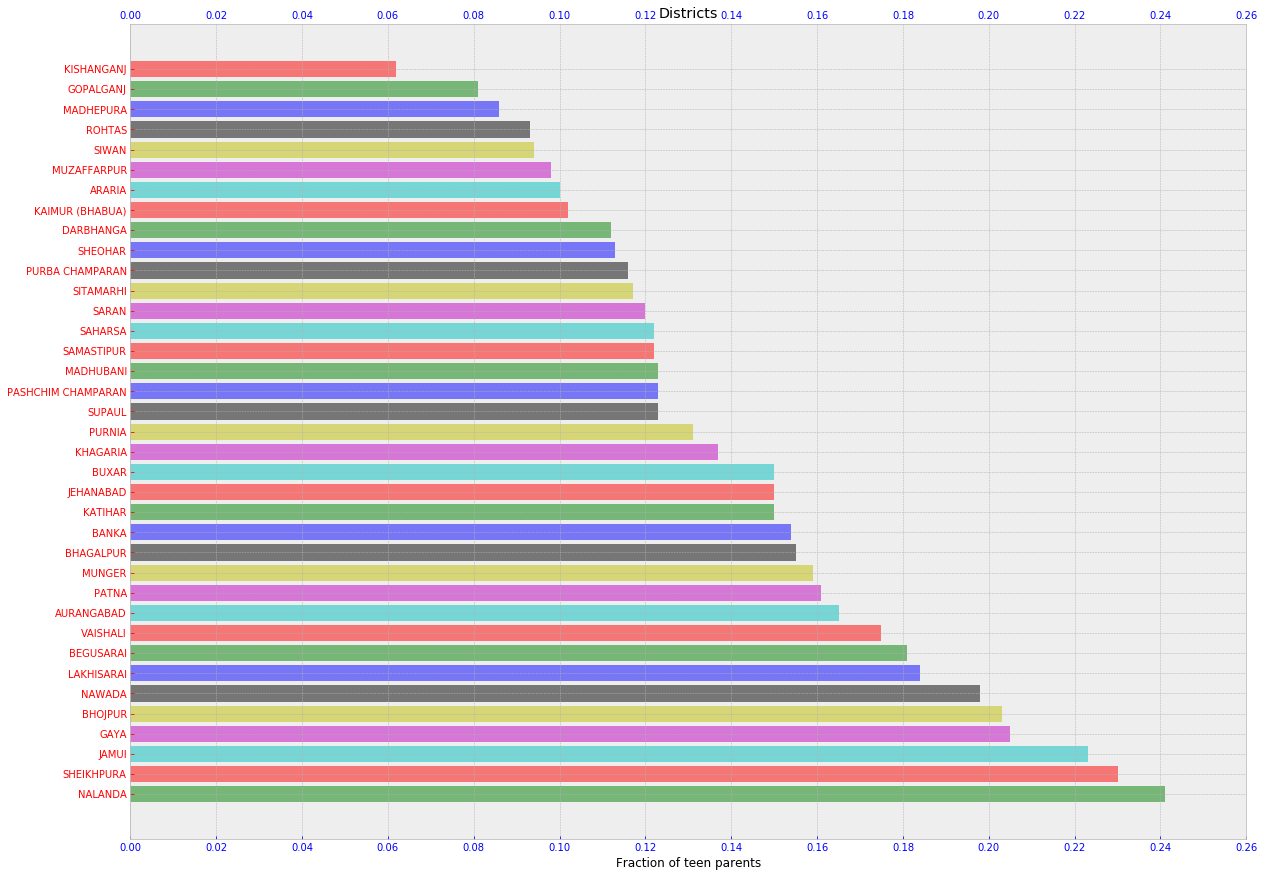

In [26]:
teen_mom_distribution('bihar')

Conclusions:
* In every district, more than 6% of women had their first kid when they were teenaagers

# Assam


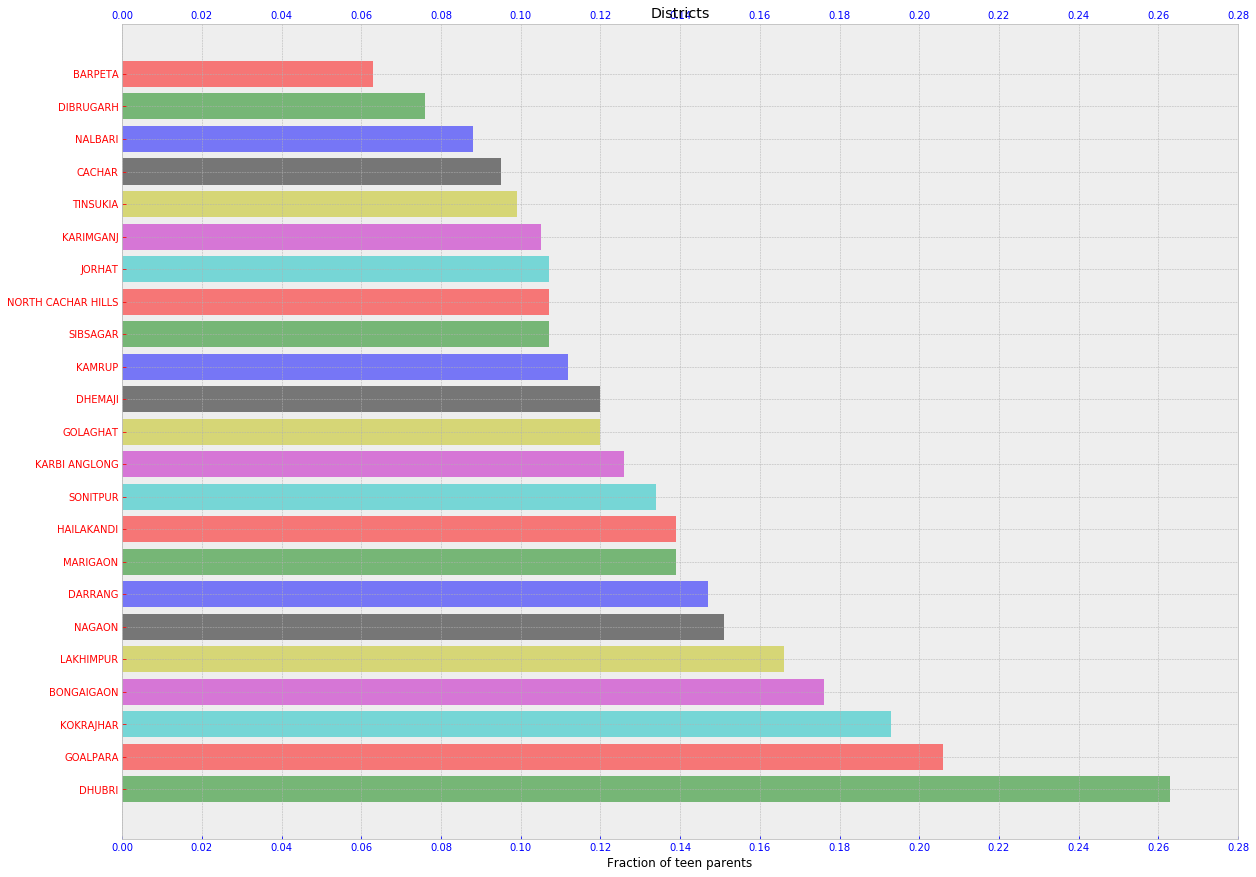

In [27]:
teen_mom_distribution('assam')

# Chhattisgarh

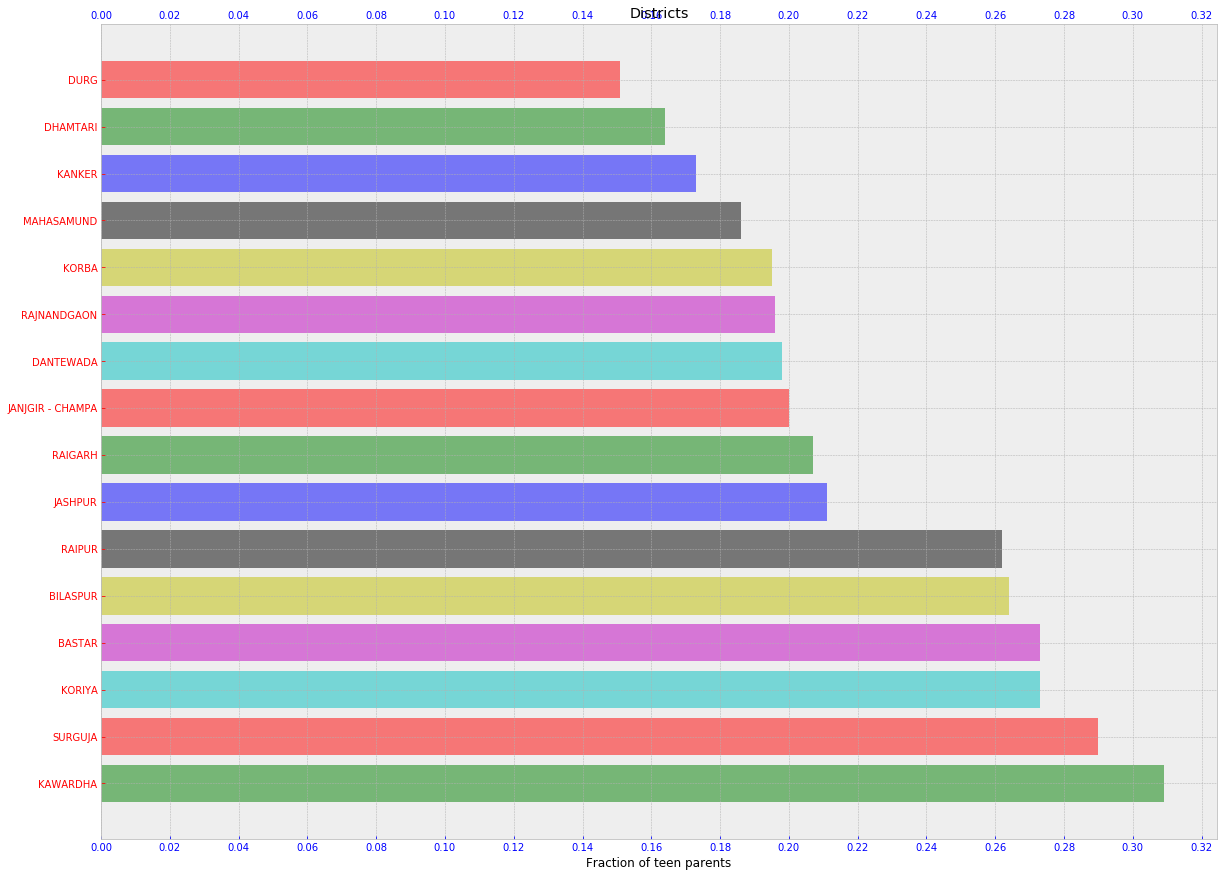

In [28]:
teen_mom_distribution('chhattisgarh')

# Jharkhand

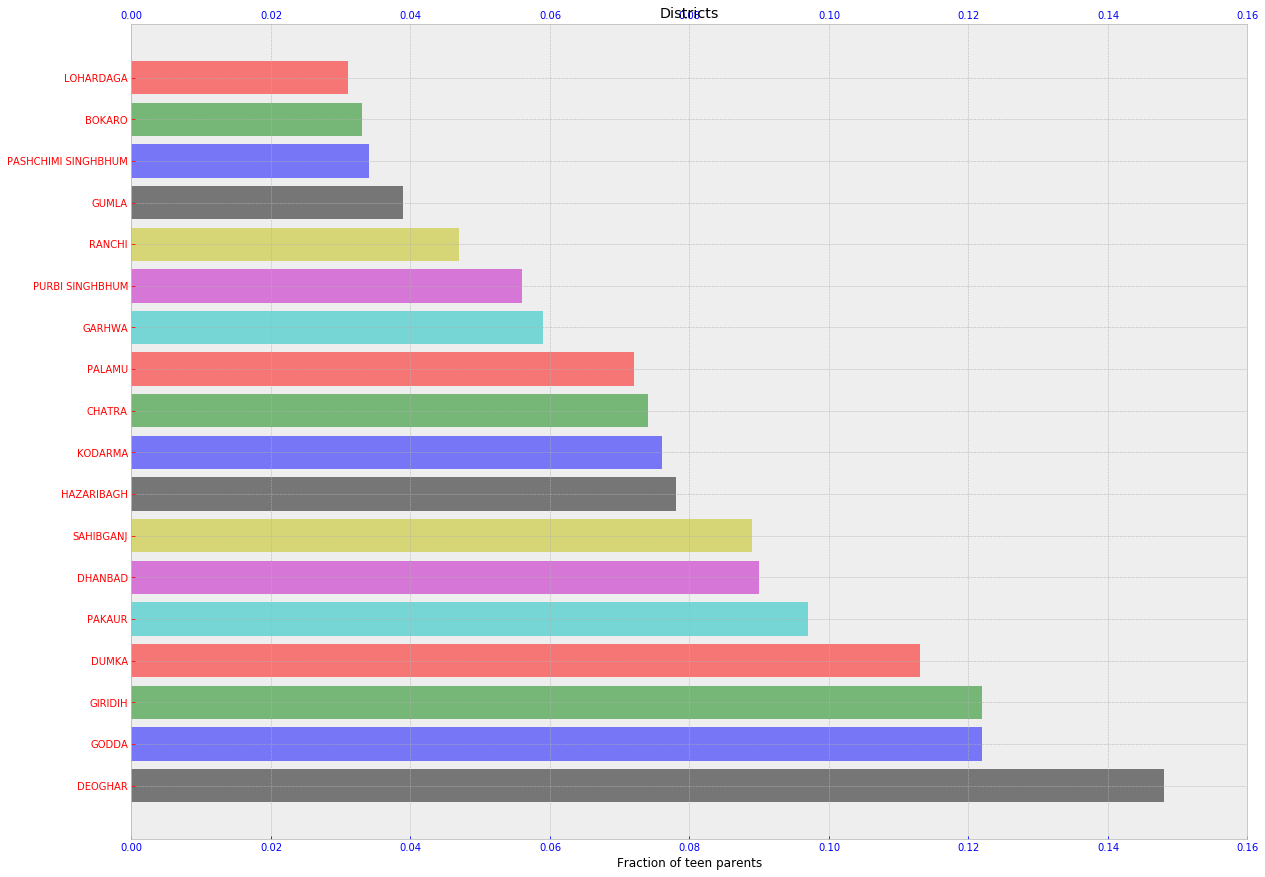

In [29]:
teen_mom_distribution('jharkhand')

# Odisha

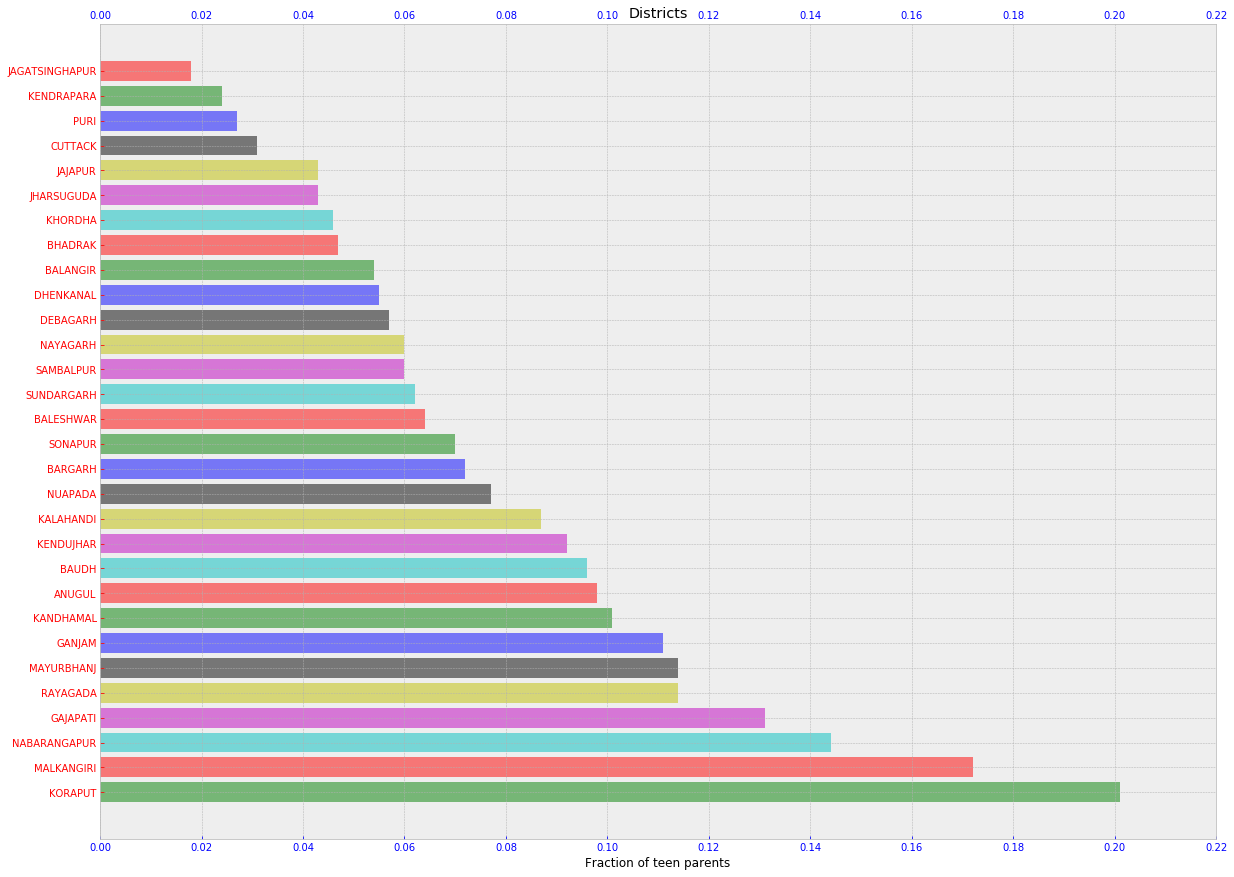

In [30]:
teen_mom_distribution('odisha')

# Madhya Pradesh

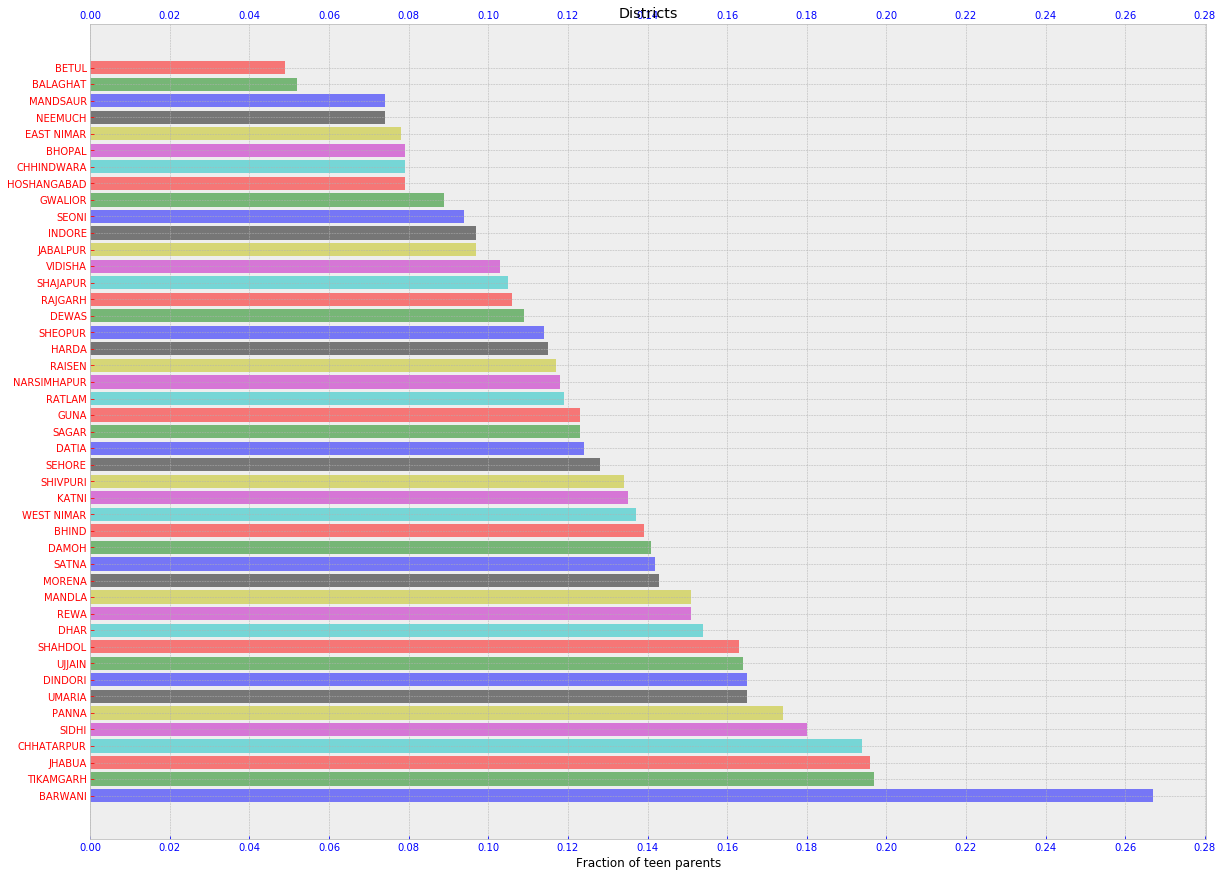

In [31]:
teen_mom_distribution('madhya pradesh')

# Rajasthan

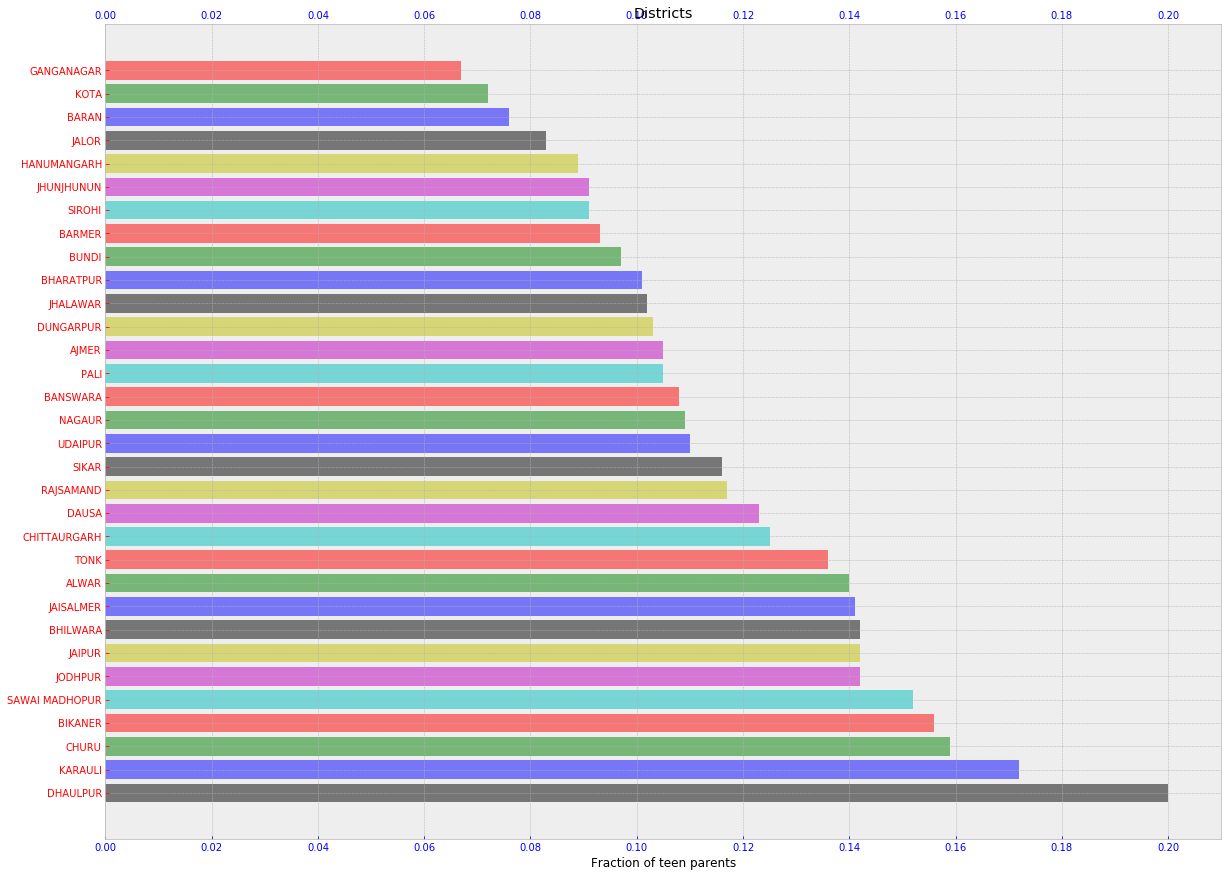

In [32]:
teen_mom_distribution('rajasthan')

# UTTAR PRADESH

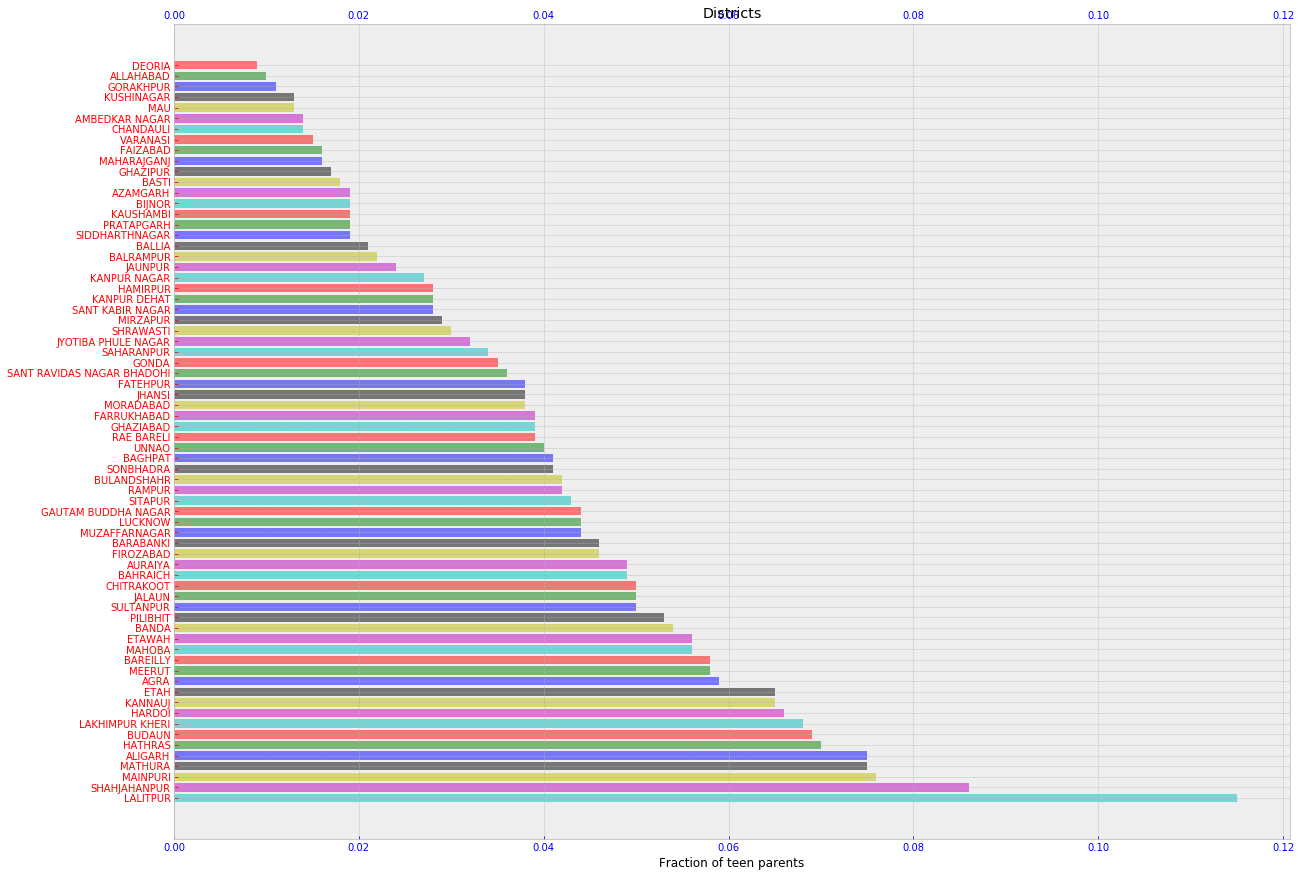

In [33]:
teen_mom_distribution('uttar pradesh')

# Uttrakhand

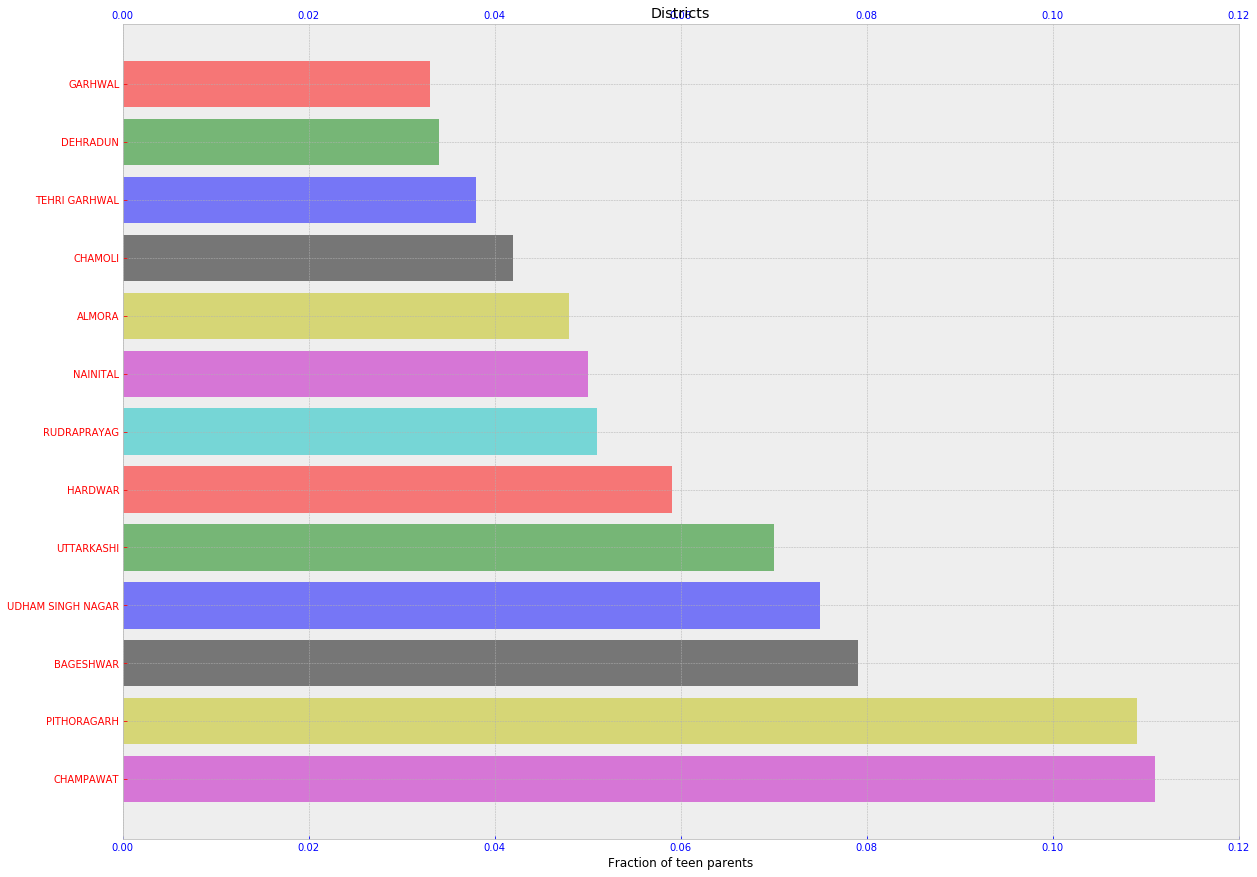

In [34]:
teen_mom_distribution('uttarakhand')

## No of pregnancies based on age

Total pragnency count = max of (born_alive_total + (1: if pregnent, else 0)) and no_of_times_conceived

We have to do this because some columes is missing no_of_times_conceived.

So recalculate no_of_times_conceived and replace it in dataframe

In [ ]:
# df1 = df.copy()

In [35]:
%%time
total_conceived = []
# for i in xrange(len(df1['no_of_times_conceived'])):
for index, row in df.iterrows():
    curr_conceived = 0
    if row.is_currently_pregnant==1:
        curr_conceived = 1
    born = row.born_alive_total + curr_conceived
    conceived = row.no_of_times_conceived
    if (abs(conceived-born) < 10):
        total_conceived.append(max( born, conceived))
    else:
        total_conceived.append(min( born, conceived))

df['no_of_times_conceived'] = pd.DataFrame(total_conceived)

# ['red' if x == 'Z' else 'green' for x in df['Set']]
# print df1.shape
# df1['curr_preg'] = [1 if x == 1 else 0 for x in df1['is_currently_pregnant']]
# print df1.shape
# df1['no_of_times_conceived'] = np.where((abs(df1.no_of_times_conceived - (df1.born_alive_total + df1.curr_preg)) < 10) & ((df1.born_alive_total + df1.curr_preg) > ), (df1.born_alive_total + abs(df.is_currently_pregnant - 2)), (df1.no_of_times_conceived))

# def my_fun (x, cur_preg, no_alive, no_conceiv):
#     curr_conceived = 0
#     if x[cur_preg] == 1:
#         curr_conceived = 1
#     born = x[no_alive]
#     conceived = x[no_conceiv]
#     if (abs(conceived-born) < 10):
#         total_conceived.append(max( born, conceived))
#     else:
#         total_conceived.append(min( born, conceived))
# print df1.shape
# df1.apply(lambda x: my_fun(x, 'is_currently_pregnant', 'born_alive_total','no_of_times_conceived'), axis=1)
# print df1.shape

Wall time: 3min 11s


Lets plot total number of pregnancy in one's lifetime.

In [36]:
print df1['age'].describe()
# df.head() #prints top 5 rows
# list(df) #print header of df
df1.plot(kind='scatter', x='no_of_times_conceived', y='age')

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

Oh, there looks lots of noise in data. Lets try to look into those noises.

In [ ]:
for i in xrange(len(df1['no_of_times_conceived'])):
    if (df1['age'][i]<=25) and (df1['no_of_times_conceived'][i]>=12):
        print df1.iloc[i]

Oh okay. A lady got 12 children alive at the age of 21. Some data entry mistakes.

Let's plot a bar graph of age vs no_of_parents_of_that_age

Now lets do it properly. Use group by method from pandas:

Make plots of no_of_parents vs no_of_times_conceived for a given age of parent
First create matrix in which row denote age_group (15-19, 20-24,...,45-49) and column denote no_of_times_pregnant.
Each cell of the matrix contains no_of_parents who belongs to the corresponding age_group and were n no_of_times_pregnant.

In [ ]:
age_parent_child = [[0 for i in xrange(20)] for j in xrange(7)] #np.zeros(shape=(7,20))
# print df.shape
# print df.age.describe()
# df.replace(['NaN'], np.nan, inplace = True)
# df.dropna(subset=['no_of_times_conceived'])
df = df[pd.notnull(df['no_of_times_conceived'])]
# print df.shape
# df.age.isnull().values.any()
# df.no_of_times_conceived.isnull().sum()
for index, row in df.iterrows():
    age_parent_child[(int(row['age'])-15)/5][int(row['no_of_times_conceived'])] += 1
print age_parent_child

In [ ]:
x = [i for i in xrange(20)]
labels = ['15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49']
plt.figure(figsize=(20,10))
i_label = 0
for age_group in age_parent_child:
    plt.plot(x, age_group, label = labels[i_label])
    i_label += 1
plt.legend(loc='best', fontsize = 20, shadow = True, fancybox = False, title ='Age-group', ncol =1)
plt.title('')# a title notation
plt.xlabel('No of times pregnant') # adding xlabel
plt.ylabel('No of parents') # adding ylabel
plt.show()

In [ ]:
# print df.shape
# print "rural", df.rural.isnull().values.any()
# print "age",df.age.isnull().values.any()
# print "highest_qualification",df.highest_qualification.isnull().values.any()
# print df.highest_qualification.isnull().sum()
# print df['highest_qualification'].isnull()
# print "no_of_times_conceived",df.no_of_times_conceived.isnull().values.any()
# print "district",df.district.isnull().values.any()

df = df.dropna(subset=['highest_qualification'])
print df.shape

# null_columns=df.columns[df.isnull().any()]
# print df[null_columns].isnull().sum()
# print df[df["is_tubectomy"].isnull()].head()


Contraceptive type used:
modern      : 1
traditional : 0
none        : -1

In [ ]:
contraceptive_used = []
modern = ["is_tubectomy", "is_vasectomy", "is_copper_t", 
                "is_pills_daily", "is_piils_weekly", "is_emergency_contraceptive", "is_condom", "is_moder_methods"]
traditional = ["is_contraceptive", "is_periodic_abstinence", "is_withdrawal", "is_amenorrahoea", "is_other_traditional_method"]

for index, row in df.iterrows():
    used = 0
    for c in modern:
        if row[c] == 1:
            contraceptive_used.append(1)
            used = 1
            break
    if used == 0:
        for cc in traditional:
            if row[cc] == 1:
                contraceptive_used.append(0)
                used = 1
                break
    if used == 0:
        contraceptive_used.append(-1)
# print contraceptive_used[:200]
# df['contraceptive_used'] = pd.DataFrame(contraceptive_used)

Lets start classification:
1. Decision Tree:

In [ ]:
# dividing X, y into train and test data
X_train, X_test, y_train, y_test = train_test_split(df[['rural', 'age', 'highest_qualification', 'district', 'no_of_times_conceived']], contraceptive_used, test_size=0.25, random_state = 0)

# training a DescisionTreeClassifier
dtree_model = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train)
dtree_predictions = dtree_model.predict(X_test)
print dtree_predictions
# creating a confusion matrix
cm = confusion_matrix(y_test, dtree_predictions, labels=[1, 0, -1])
print cm
# plt.imshow(cm, cmap='binary', interpolation='None')
# plt.show()
labels = ['Modern', 'Traditional', 'None']

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
# plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

2. SVM:

In [ ]:
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train)
svm_predictions = svm_model_linear.predict(X_test)
 
# model accuracy for X_test  
accuracy = svm_model_linear.score(X_test, y_test)
print accuracy

# creating a confusion matrix
svm_cm = confusion_matrix(y_test, svm_predictions, labels=[1, 0, -1])

print svm_cm
sns.heatmap(svm_cm, annot=True)

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train)
 
# accuracy on X_test
accuracy_knn = knn.score(X_test, y_test)
print accuracy_knn
 
# creating a confusion matrix
knn_predictions = knn.predict(X_test) 
knn_cm = confusion_matrix(y_test, knn_predictions, labels=[1, 0, -1])
print knn_cm

In [ ]:
gnb = GaussianNB().fit(X_train, y_train)
gnb_predictions = gnb.predict(X_test)
 
# accuracy on X_test
accuracy_gnb = gnb.score(X_test, y_test)
print accuracy_gnb
 
# creating a confusion matrix
gnb_cm = confusion_matrix(y_test, gnb_predictions, labels=[1, 0, -1])
print gnb_cm

In [ ]:
rf = RandomForestClassifier(n_estimators=50, oob_score=True, n_jobs=-1, random_state=123456)
rf.fit(X_train, y_train)
rf_predictions = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, rf_predictions)
print rf.oob_score_
print('Mean accuracy score:', accuracy_rf)

rf_cm = confusion_matrix(y_test, rf_predictions, labels=[1, 0, -1])
print rf_cm
sns.heatmap(rf_cm, annot=True)

In [ ]:
print contraceptive_used.unique()